# trainning model classification

In [1]:
import pandas as pd

datasetT = pd.read_csv("datasets/train.csv")
dataset =datasetT.drop("PassengerId", axis=1)
print(dataset.shape)
dataset.head(10)

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>],
       [<AxesSubplot:title={'center':'Parch'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

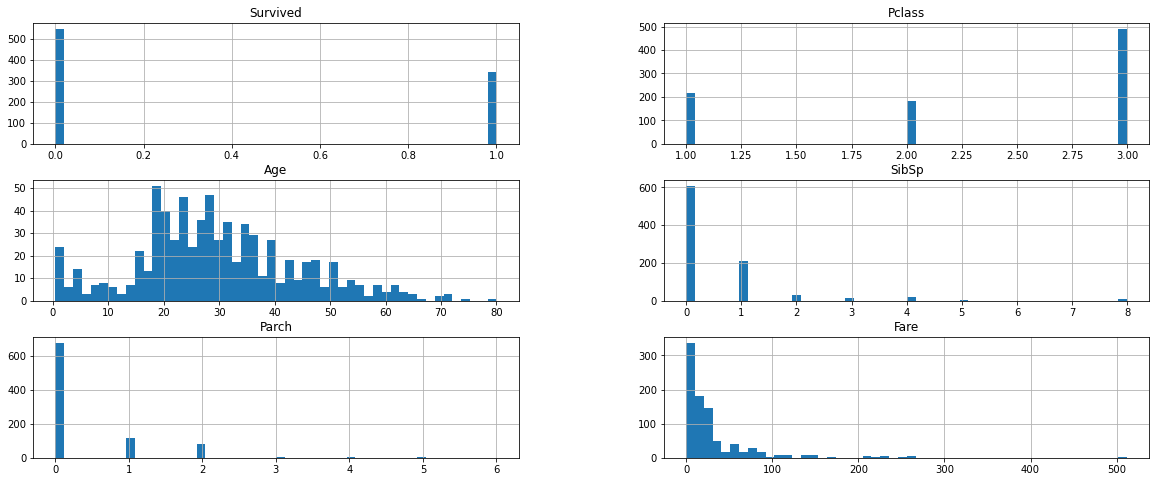

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

dataset.hist(bins=50, figsize=(20,8))

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [4]:
#voir si la variable Cabin et Embarked sont bien des donnees de classification:
print(dataset["Cabin"].value_counts())
print("Pour un autre ")
print(dataset["Embarked"].value_counts())
print("Pour un autre ")
print(dataset["Ticket"].value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64
Pour un autre 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
Pour un autre 
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64


In [5]:
#Supp cabin
dataset = dataset.drop(["Cabin", "Name", "Ticket"], axis=1)
print(dataset.shape)

(891, 8)


In [6]:
analytic = dataset.drop(["Survived", "Pclass", "Parch", "SibSp"], axis=1)
analytic.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [7]:
ageSurvived = dataset[dataset["Survived"]==1]["Age"]
print("Pour les personnes ayant survecu")
print(ageSurvived.max())
print(ageSurvived.min())
print(ageSurvived.count())


print("\nPour les non survivannt")
ageNoSurvived = dataset[dataset["Survived"]==0]["Age"]
print(ageNoSurvived.count())
print(ageNoSurvived.max())
print(ageNoSurvived.min())

Pour les personnes ayant survecu
80.0
0.42
290

Pour les non survivannt
424
74.0
1.0


<AxesSubplot:xlabel='Survived', ylabel='Age'>

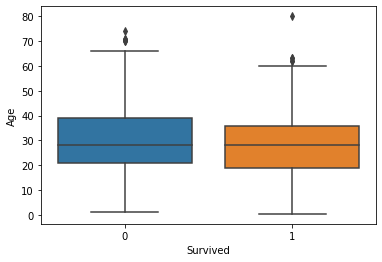

In [8]:
#voir selon un age determiner une personne a plus de chance de survivre:
import seaborn as sns 
sns.boxplot(x="Survived", y="Age", data=dataset)


In [9]:
#selon la class une personne a plus de chance de survivre:
#pour ceux qui n ont pas survecu
countClass = dataset["Pclass"]

In [10]:
#selon la class une personne a plus de chance de survivre:
#pour ceux qui n ont pas survecu
noSurvived = dataset[dataset["Survived"]==0]["Pclass"]

In [11]:
#selon la class une personne a plus de chance de survivre:
#pour ceux qui ont survecu
survived = dataset[dataset["Survived"]==1]["Pclass"]

In [12]:
countClass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [13]:
#pour presenter comment les nombres de personnes non vívant par class
noSurvived.value_counts()

3    372
2     97
1     80
Name: Pclass, dtype: int64

In [14]:
survived.value_counts()

1    136
3    119
2     87
Name: Pclass, dtype: int64

In [15]:
#selon le sex le client a plus de chance de survivre
#voir le nombre d´homme et de femmme
sex= dataset["Sex"]
sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
#selon le sex le client a plus de chance de survivre
sexNoSurvived = dataset[dataset["Survived"]==0]["Sex"]
sexNoSurvived.value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [17]:
#selon le sex le client a plus de chance de survivre
sexSurvived = dataset[dataset["Survived"]==1]["Sex"]
sexSurvived.value_counts()

female    233
male      109
Name: Sex, dtype: int64

In [18]:
dataset[dataset["Sex"]=="female"]["Pclass"].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [19]:
dataset[dataset["Sex"]=="male"]["Pclass"].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

# Preprocessing

In [20]:
titanic = datasetT

In [21]:
print(titanic.columns)
titanic.shape

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


(891, 12)

In [22]:
titanic = titanic.drop(["Cabin", "Name", "Ticket"], axis=1)
titanic = titanic.fillna(titanic["Age"].mean())
print(titanic.shape)
titanic.head(10)

(891, 9)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
5,6,0,3,male,29.699118,0,0,8.4583,Q
6,7,0,1,male,54.000000,0,0,51.8625,S
7,8,0,3,male,2.000000,3,1,21.0750,S
8,9,1,3,female,27.000000,0,2,11.1333,S
9,10,1,2,female,14.000000,1,0,30.0708,C


In [23]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [24]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

#encoder le sex
Sex = titanic["Sex"].values.reshape(-1,1)
encoder = LabelEncoder()
Sex = encoder.fit_transform(Sex)
Sex = Sex.ravel()
titanic = titanic.drop("Sex", axis=1)
Sex = pd.DataFrame(
    {
        "Sex": Sex
    }
)
titanic = pd.concat([titanic, Sex], axis=1)
titanic.head(10)

C:\Users\MOHAM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.000000,1,0,7.2500,S,1
1,2,1,1,38.000000,1,0,71.2833,C,0
2,3,1,3,26.000000,0,0,7.9250,S,0
3,4,1,1,35.000000,1,0,53.1000,S,0
4,5,0,3,35.000000,0,0,8.0500,S,1
5,6,0,3,29.699118,0,0,8.4583,Q,1
6,7,0,1,54.000000,0,0,51.8625,S,1
7,8,0,3,2.000000,3,1,21.0750,S,1
8,9,1,3,27.000000,0,2,11.1333,S,0
9,10,1,2,14.000000,1,0,30.0708,C,0


In [25]:
#encoder le Embarked
embarked = titanic["Embarked"].values.reshape(-1,1)
embarked = embarked.astype(str)
embarked = encoder.fit_transform(embarked)
embarked = embarked.ravel()
titanic = titanic.drop("Embarked", axis=1)
embarked = pd.DataFrame(
    {
        "Embarked": embarked
    }
)
titanic = pd.concat([titanic, embarked], axis=1)
titanic.head(10)

C:\Users\MOHAM\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,1,0,3,22.000000,1,0,7.2500,1,3
1,2,1,1,38.000000,1,0,71.2833,0,1
2,3,1,3,26.000000,0,0,7.9250,0,3
3,4,1,1,35.000000,1,0,53.1000,0,3
4,5,0,3,35.000000,0,0,8.0500,1,3
5,6,0,3,29.699118,0,0,8.4583,1,2
6,7,0,1,54.000000,0,0,51.8625,1,3
7,8,0,3,2.000000,3,1,21.0750,1,3
8,9,1,3,27.000000,0,2,11.1333,0,3
9,10,1,2,14.000000,1,0,30.0708,0,1


In [26]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex          891 non-null    int32  
 8   Embarked     891 non-null    int64  
dtypes: float64(2), int32(1), int64(6)
memory usage: 59.3 KB


In [27]:
y = titanic["Survived"]
X = titanic.drop("Survived", axis=1)
print(X.shape)
print(y.shape)
print(X.columns)

(891, 8)
(891,)
Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex',
       'Embarked'],
      dtype='object')


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print(X_train.shape, " ", X_test.shape)
print(y_train.shape, " ", y_test.shape)

(712, 8)   (179, 8)
(712,)   (179,)


# Modeling

In [29]:
y_train_survived = (y_train == 1)
y_test_survived = (y_test == 1)
print(y_train_survived)
print(y_test_survived)

140    False
874     True
466    False
578    False
60     False
       ...  
78      True
648    False
622     True
888    False
544    False
Name: Survived, Length: 712, dtype: bool
561    False
34     False
784    False
745    False
16     False
       ...  
729    False
313    False
779     True
446     True
484     True
Name: Survived, Length: 179, dtype: bool


In [30]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

In [31]:
from sklearn.pipeline import make_pipeline

model_svc = make_pipeline(StandardScaler(), SVC())
model_sgd = make_pipeline(StandardScaler(), SGDClassifier(random_state=42))
model_neighbors = make_pipeline(StandardScaler(), KNeighborsClassifier())


In [32]:
#train models:
for model in (model_svc, model_sgd, model_neighbors):
    model.fit(X_train, y_train_survived)
    print(model.score(X_test, y_test_survived))

0.8212290502793296
0.7094972067039106
0.7821229050279329


In [33]:
from sklearn.model_selection import cross_val_predict

y_train_pred_svc = cross_val_predict(model_svc, X_train, y_train, cv=3)
y_train_pred_sgd = cross_val_predict(model_sgd, X_train, y_train, cv=3)
y_train_pred_neighbors = cross_val_predict(model_neighbors, X_train, y_train, cv=3)

In [34]:
#test de performance des models avec la confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_survived, y_train_pred_svc)

array([[399,  44],
       [ 86, 183]], dtype=int64)

In [35]:
confusion_matrix(y_train_survived, y_train_pred_sgd)

array([[405,  38],
       [146, 123]], dtype=int64)

In [36]:
confusion_matrix(y_train_survived, y_train_pred_neighbors)

array([[385,  58],
       [ 87, 182]], dtype=int64)

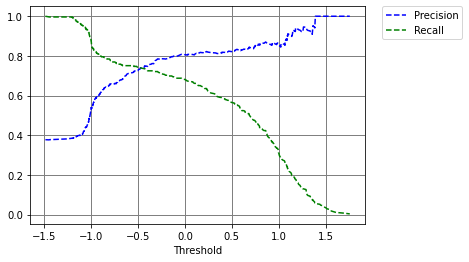

In [37]:
from sklearn.metrics import precision_recall_curve

#on va chercher une grande prediction avec le SVC
y_score_svc = cross_val_predict(model_svc, X_train, y_train_survived, cv=3,
                             method="decision_function")

precision, recall, thresholds = precision_recall_curve(y_train_survived, 
                                                      y_score_svc)

def plot_precision_recall_vs_thresholds(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "b--", label="Precision")
    plt.plot(thresholds, recall[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
    plt.grid(b=True, which="both", axis="both", color='gray', linestyle='-', linewidth=1)

plot_precision_recall_vs_thresholds(precision, recall, thresholds)

In [38]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

threshold_90_precision = thresholds[np.argmax(precision >= .90)]

y_train_pred_90 = (y_score_svc >= threshold_90_precision)
print(precision_score(y_train_survived, y_train_pred_90))
print(recall_score(y_train_survived, y_train_pred_90))

0.9027777777777778
0.241635687732342


In [39]:
confusion_matrix(y_train_survived, y_train_pred_90)

array([[436,   7],
       [204,  65]], dtype=int64)

In [41]:
threshold_90_precision

1.091373251460186